# Clustering and Segmentation

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from skimage import filters
from skimage.io import imread, imshow, imsave
from skimage.color import rgb2hsv, rgb2gray, rgb2yuv
from sklearn.cluster import KMeans
from matplotlib.patches import Rectangle
from myfuncs import funcs


First we crop to the desired ROI

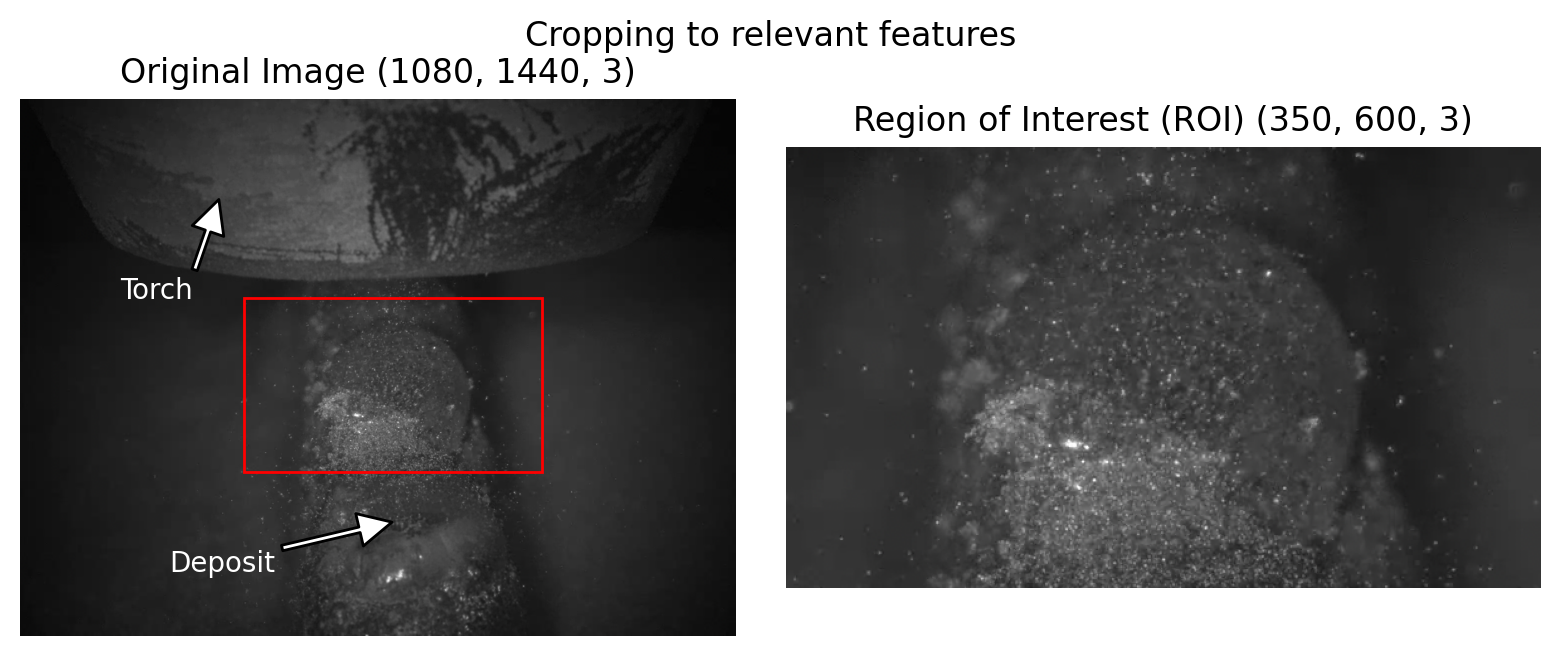

In [2]:
img = imread('Images/Inputs/Set1/20240816-161944712534-0002.png')
img_cropped = img[400:750, 450:1050]

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(8,3.3), dpi=200)

fig.suptitle('Cropping to relevant features')

ax1.set_title('Original Image '+str(img.shape))
ax1.imshow(img)
ax1.add_patch(Rectangle((450, 400), 600, 350, color='red', fill=False, lw=1))
ax1.annotate('Torch', xy=(400,200), xytext=(200,400), color='white', 
             arrowprops=dict(facecolor='white', shrink=0.01, width=2))
ax1.annotate('Deposit', xy=(750,850), xytext=(300,950), color='white', 
             arrowprops=dict(facecolor='white', shrink=0.01, width=2))
ax1.set_axis_off()

ax2.set_title('Region of Interest (ROI) '+str(img_cropped.shape))
ax2.imshow(img_cropped)
ax2.set_axis_off()

fig.tight_layout()

## Applying K-Means

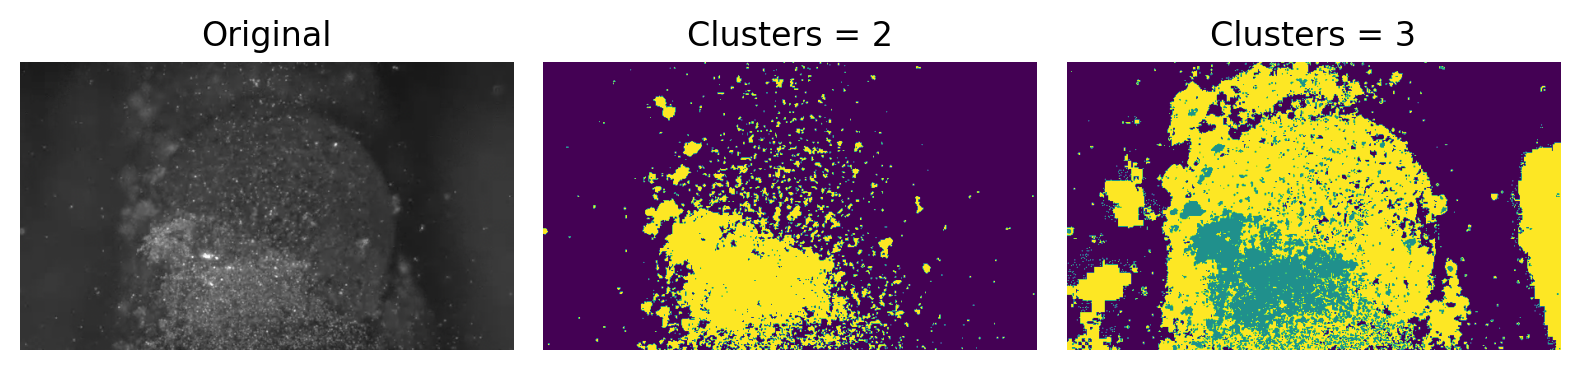

In [9]:
fig, axs = plt.subplots(1, 3, figsize=(8, 3.3), dpi=200)

titles = ['Original', 'Clusters = 2', 'Clusters = 3']

imgs = [img_cropped, funcs.apply_kmeans(img_cropped, 2), funcs.apply_kmeans(img_cropped, 3)]

for n, ax in enumerate(axs.flatten()):
    ax.set_title(titles[n])
    ax.imshow(imgs[n])
    ax.set_axis_off()

fig.tight_layout()

Clearly not ideal.

we try applying gaussian blur before the analysis

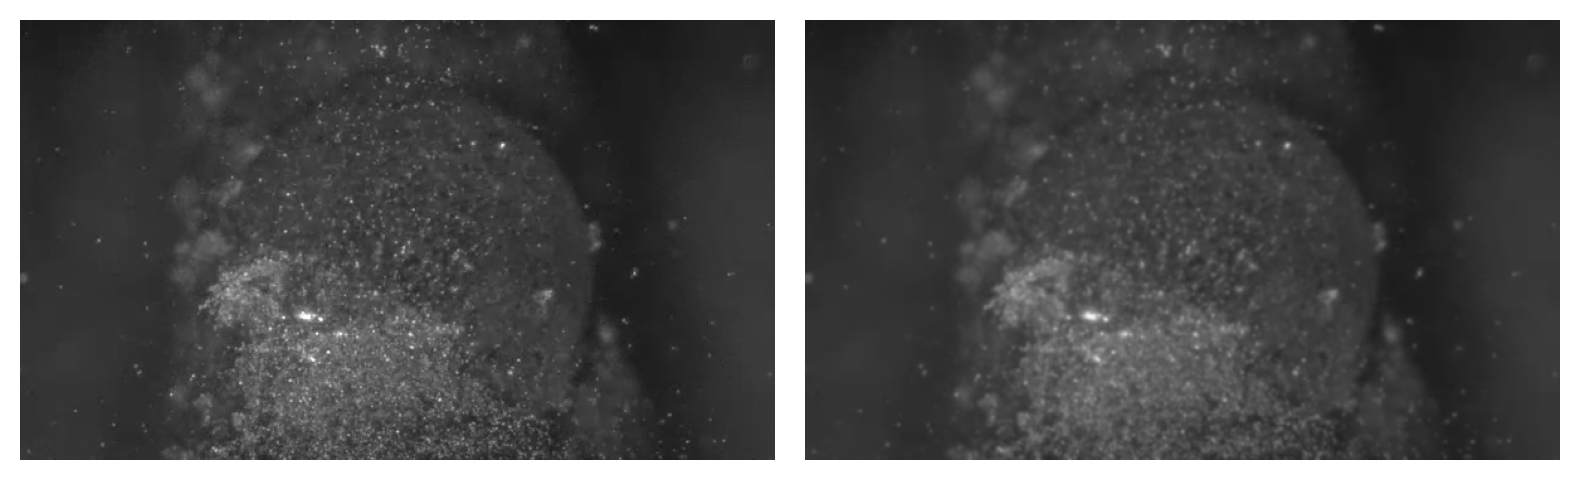

In [10]:
img_blur = filters.gaussian(img_cropped, sigma=1)
funcs.comparer_duo(img_cropped, img_blur)

(630000,)

/Users/sid/opt/anaconda3/envs/3dpmd/lib/python3.12/site-packages/skimage/io/_plugins/matplotlib_plugin.py:158: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


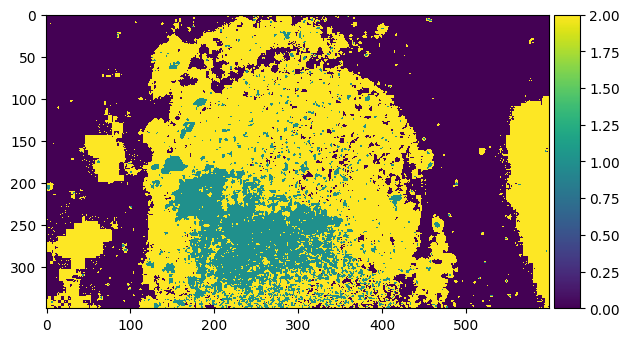

In [4]:
imshow(funcs.apply_kmeans(img_cropped, 3))